In [1]:

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
X_train[0].shape

(28, 28)

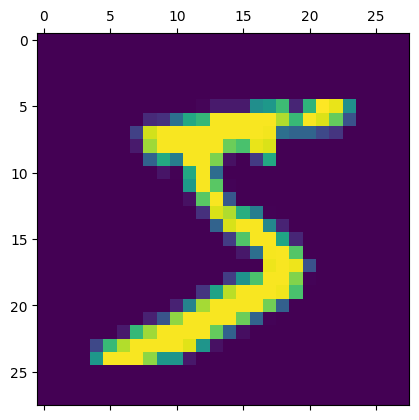

In [5]:

plt.matshow(X_train[0])

In [6]:
y_train[0]

5

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train_flat = X_train.reshape(len(X_train),784)

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784, ), activation="sigmoid")
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 585us/step - loss: 0.4706 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 1s 590us/step - loss: 0.3041 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 1s 581us/step - loss: 0.2833 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 1s 605us/step - loss: 0.2732 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 1s 658us/step - loss: 0.2667 - accuracy: 0.9256


In [13]:
X_test_flat = X_test.reshape(len(X_test),784)
eval_results = model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 0s 483us/step - loss: 0.2674 - accuracy: 0.9262


In [14]:
eval_results

[0.2673913836479187, 0.9261999726295471]

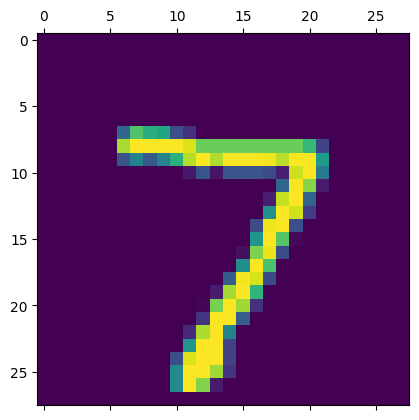

In [16]:
plt.matshow(X_test[0])

In [17]:
y_pred = model.predict(X_test_flat)

313/313 [==============================] - 0s 419us/step


In [18]:
y_pred[0]

array([1.86652225e-02, 3.81749970e-07, 4.11179326e-02, 9.54017580e-01,
       2.83225114e-03, 1.04179285e-01, 1.02021022e-06, 9.99768376e-01,
       8.40669647e-02, 7.03511715e-01], dtype=float32)

In [22]:
np.argmax(y_pred[0])

7

In [23]:
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

In [24]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    6,    5,    2,    2,    1],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   6,    9,  930,   15,    8,    5,   12,   10,   33,    4],
       [   3,    0,   18,  916,    0,   30,    3,   11,   20,    9],
       [   1,    2,    5,    1,  920,    0,    9,    3,    6,   35],
       [   7,    3,    4,   24,   11,  791,   15,    5,   25,    7],
       [  10,    3,    7,    1,    7,   14,  913,    2,    1,    0],
       [   1,    8,   22,    7,    9,    0,    0,  941,    1,   39],
       [   7,   12,    7,   23,    9,   37,    9,   11,  848,   11],
       [   9,    7,    2,   10,   28,    8,    0,   16,    5,  924]])>

In [26]:
import seaborn as sn

Text(95.72222222222221, 0.5, 'Real')

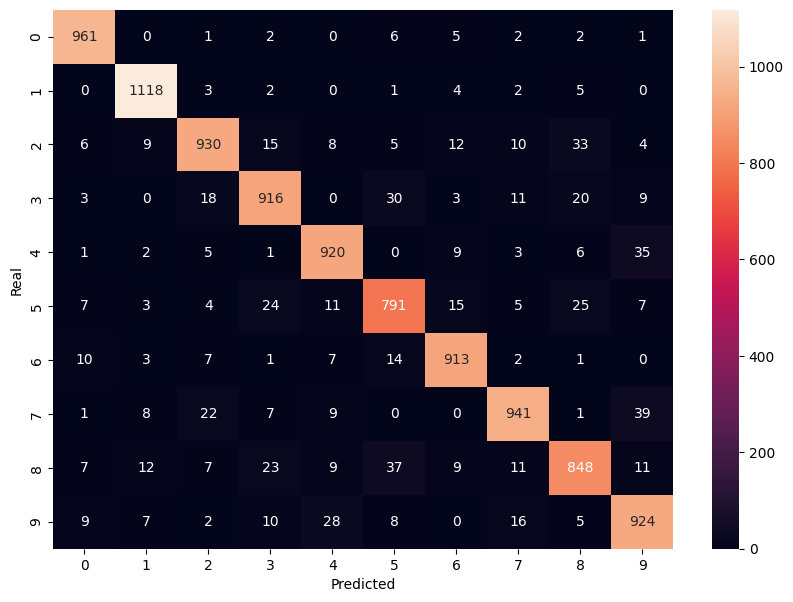

In [32]:
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Real")

In [40]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784, ), activation="relu"),
    keras.layers.Dense(100, input_shape=(784, ), activation="relu"),
    keras.layers.Dense(10, activation="sigmoid"),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 754us/step - loss: 0.2438 - accuracy: 0.9270
Epoch 2/5
1875/1875 [==============================] - 1s 733us/step - loss: 0.1032 - accuracy: 0.9680
Epoch 3/5
1875/1875 [==============================] - 1s 745us/step - loss: 0.0720 - accuracy: 0.9773
Epoch 4/5
1875/1875 [==============================] - 1s 746us/step - loss: 0.0564 - accuracy: 0.9816
Epoch 5/5
1875/1875 [==============================] - 1s 732us/step - loss: 0.0462 - accuracy: 0.9851


313/313 [==============================] - 0s 508us/step


Text(95.72222222222221, 0.5, 'Real')

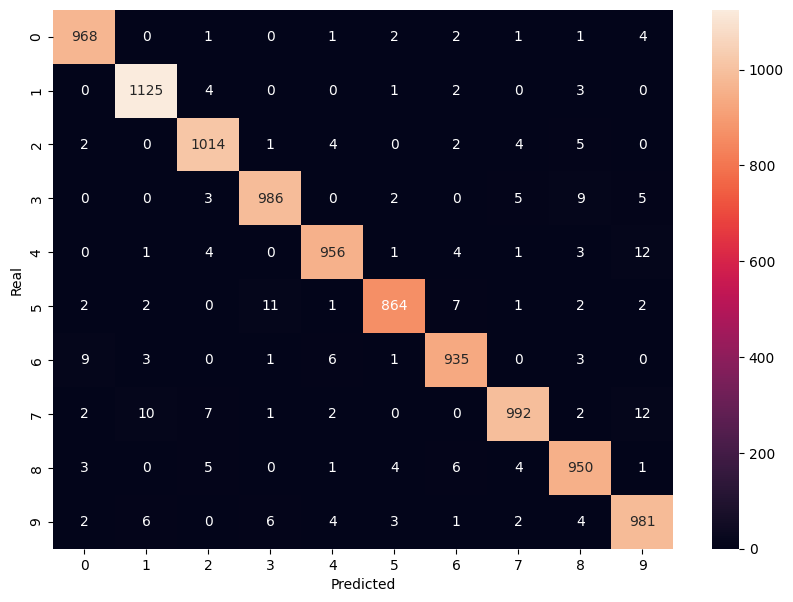

In [41]:
y_pred = model.predict(X_test_flat)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Real")

In [42]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid"),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 757us/step - loss: 0.2489 - accuracy: 0.9271
Epoch 2/5
1875/1875 [==============================] - 1s 746us/step - loss: 0.1047 - accuracy: 0.9679
Epoch 3/5
1875/1875 [==============================] - 1s 740us/step - loss: 0.0744 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 1s 759us/step - loss: 0.0556 - accuracy: 0.9825
Epoch 5/5
1875/1875 [==============================] - 1s 741us/step - loss: 0.0465 - accuracy: 0.9848


313/313 [==============================] - 0s 511us/step


Text(95.72222222222221, 0.5, 'Real')

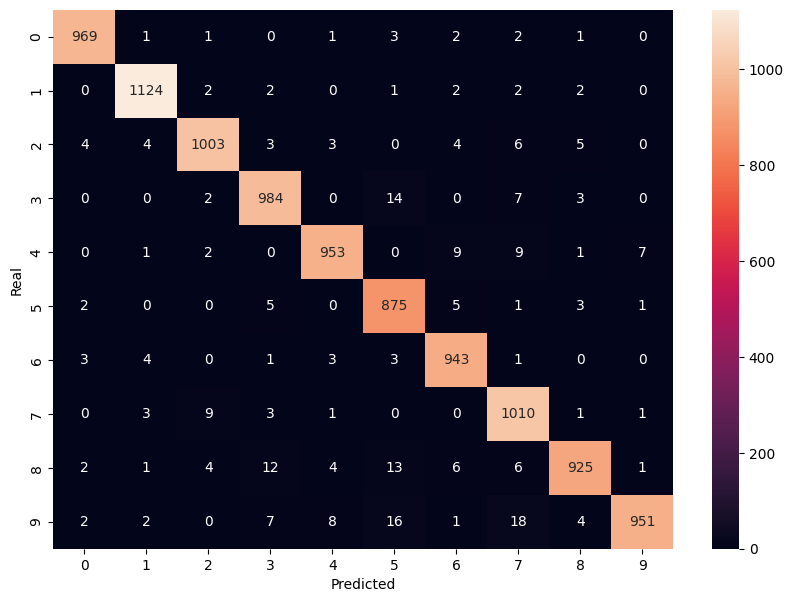

In [46]:
y_pred = model.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Real")

In [61]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 852us/step - loss: 0.2411 - accuracy: 0.9285
Epoch 2/5
1875/1875 [==============================] - 2s 854us/step - loss: 0.1117 - accuracy: 0.9668
Epoch 3/5
1875/1875 [==============================] - 2s 861us/step - loss: 0.0841 - accuracy: 0.9756
Epoch 4/5
1875/1875 [==============================] - 2s 873us/step - loss: 0.0691 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 2s 873us/step - loss: 0.0587 - accuracy: 0.9836
